In [6]:
import pandas as pd

In [8]:
df=pd.read_csv(r'C:/Users/suraj/Desktop/codes/GitHub/Predict_Covid19_Cases_Using_Prophet/covid_19_clean_complete.csv')

In [10]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,1/22/2020,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,1/22/2020,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,1/22/2020,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,1/22/2020,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,1/22/2020,0,0,0,0,Africa


In [14]:
df.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
WHO Region                object
dtype: object

In [13]:
df['Date']=pd.to_datetime(df['Date'])

In [16]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [18]:
df['Date'].nunique()

188

In [20]:
df.shape

(49068, 10)

In [23]:
total=df.groupby(['Date'])['Confirmed','Deaths','Active','Recovered'].sum().reset_index()

<ipython-input-23-b4a6b842d20d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total=df.groupby(['Date'])['Confirmed','Deaths','Active','Recovered'].sum().reset_index()


In [25]:
total.head()

,Date,Confirmed,Deaths,Active,Recovered
0,2020-01-22,555,17,510,28
1,2020-01-23,654,18,606,30
2,2020-01-24,941,26,879,36
3,2020-01-25,1434,42,1353,39
4,2020-01-26,2118,56,2010,52


In [26]:
df_prophet=total.rename(columns={'Date':'ds','Confirmed':'y'})

In [27]:
from fbprophet import Prophet

In [28]:
m=Prophet()
model=m.fit(df_prophet)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
model.seasonalities

OrderedDict([('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [31]:
future_global=model.make_future_dataframe(periods=30,freq='D')

In [32]:
future_global.head()

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [33]:
future_global.shape

(218, 1)

In [34]:
prediction = model.predict(future_global)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-1.026324e+04,-1.285208e+05,7.790670e+04,-1.026324e+04,-1.026324e+04,-10998.811882,-10998.811882,-10998.811882,-10998.811882,-10998.811882,-10998.811882,0.0,0.0,0.0,-2.126205e+04
1,2020-01-23,-7.538978e+03,-1.193033e+05,9.956167e+04,-7.538978e+03,-7.538978e+03,-1088.216908,-1088.216908,-1088.216908,-1088.216908,-1088.216908,-1088.216908,0.0,0.0,0.0,-8.627195e+03
2,2020-01-24,-4.814719e+03,-9.951694e+04,1.169592e+05,-4.814719e+03,-4.814719e+03,10093.352467,10093.352467,10093.352467,10093.352467,10093.352467,10093.352467,0.0,0.0,0.0,5.278633e+03
3,2020-01-25,-2.090460e+03,-9.476373e+04,1.135088e+05,-2.090460e+03,-2.090460e+03,13730.616519,13730.616519,13730.616519,13730.616519,13730.616519,13730.616519,0.0,0.0,0.0,1.164016e+04
4,2020-01-26,6.337997e+02,-9.428769e+04,1.138108e+05,6.337997e+02,6.337997e+02,7242.091568,7242.091568,7242.091568,7242.091568,7242.091568,7242.091568,0.0,0.0,0.0,7.875891e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2020-08-22,2.143927e+07,2.105977e+07,2.183682e+07,2.106651e+07,2.181008e+07,13730.616519,13730.616519,13730.616519,13730.616519,13730.616519,13730.616519,0.0,0.0,0.0,2.145300e+07
214,2020-08-23,2.164331e+07,2.123012e+07,2.204955e+07,2.124251e+07,2.203396e+07,7242.091568,7242.091568,7242.091568,7242.091568,7242.091568,7242.091568,0.0,0.0,0.0,2.165056e+07
215,2020-08-24,2.184736e+07,2.141467e+07,2.224580e+07,2.141819e+07,2.225418e+07,-2157.127683,-2157.127683,-2157.127683,-2157.127683,-2157.127683,-2157.127683,0.0,0.0,0.0,2.184521e+07
216,2020-08-25,2.205141e+07,2.158033e+07,2.248790e+07,2.159321e+07,2.248004e+07,-16821.904081,-16821.904081,-16821.904081,-16821.904081,-16821.904081,-16821.904081,0.0,0.0,0.0,2.203459e+07


In [35]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
213,2020-08-22,2.145300e+07,2.105977e+07,2.183682e+07
214,2020-08-23,2.165056e+07,2.123012e+07,2.204955e+07
215,2020-08-24,2.184521e+07,2.141467e+07,2.224580e+07
216,2020-08-25,2.203459e+07,2.158033e+07,2.248790e+07
217,2020-08-26,2.224446e+07,2.177990e+07,2.271458e+07


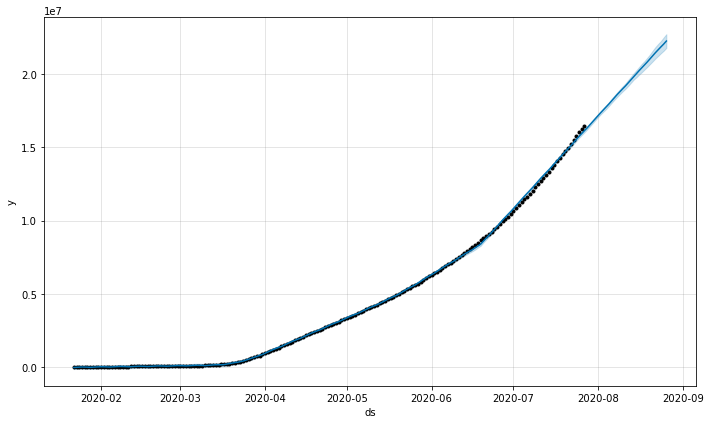

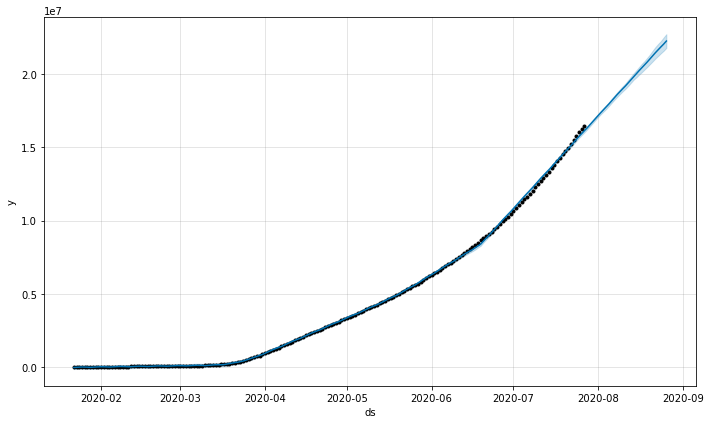

In [36]:
model.plot(prediction)

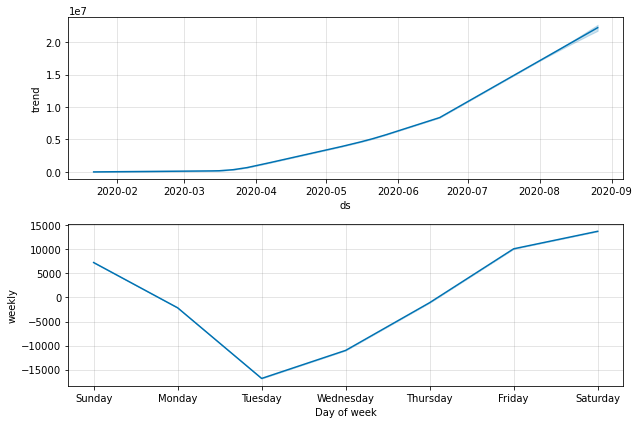

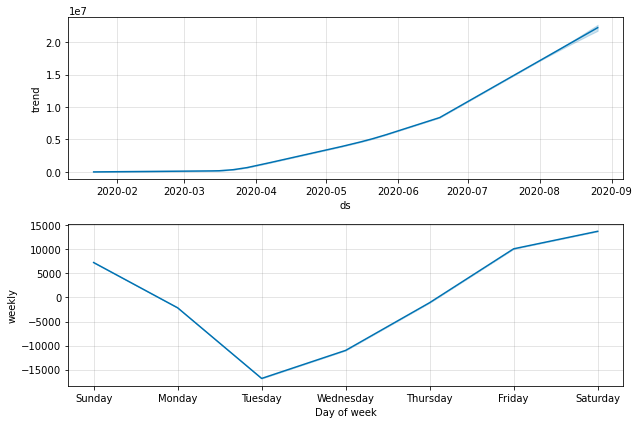

In [37]:
model.plot_components(prediction)

In [41]:
from fbprophet.plot import add_changepoints_to_plot

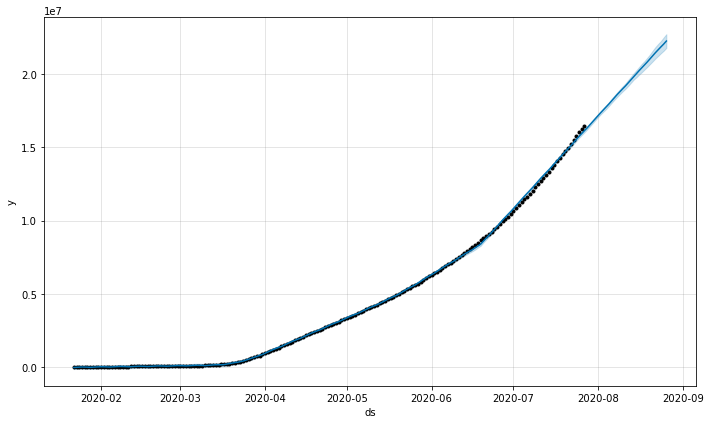

In [42]:
fig=model.plot(prediction)

In [43]:
a=add_changepoints_to_plot(fig.gca(),model,prediction)

In [45]:
from fbprophet.diagnostics import cross_validation

In [46]:
df_cv=cross_validation(model,horizon='30 days',period='15 days',initial='90 days')

INFO:fbprophet:Making 5 forecasts with cutoffs between 2020-04-28 00:00:00 and 2020-06-27 00:00:00


In [47]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-29,3.201064e+06,3.196282e+06,3.206419e+06,3185195,2020-04-28
1,2020-04-30,3.285432e+06,3.279665e+06,3.292166e+06,3268876,2020-04-28
2,2020-05-01,3.369640e+06,3.361153e+06,3.378464e+06,3355922,2020-04-28
3,2020-05-02,3.450902e+06,3.440552e+06,3.463794e+06,3437608,2020-04-28
4,2020-05-03,3.530365e+06,3.515001e+06,3.547612e+06,3515244,2020-04-28


In [48]:
df_cv.shape

(150, 6)

In [49]:
from fbprophet.diagnostics import performance_metrics

In [50]:
df_performance = performance_metrics(df_cv)

In [51]:
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,2.734717e+10,165369.785518,129489.387708,0.016904,0.017716,0.000000
1,4 days,3.787410e+10,194612.693921,151701.684208,0.019368,0.022542,0.000000
2,5 days,5.191722e+10,227853.495565,175555.503042,0.021819,0.025758,0.066667
3,6 days,6.963823e+10,263890.562093,202553.010911,0.024598,0.026753,0.133333
4,7 days,9.044171e+10,300735.281743,232910.923487,0.027881,0.031313,0.200000


In [52]:
from fbprophet.plot import plot_cross_validation_metric

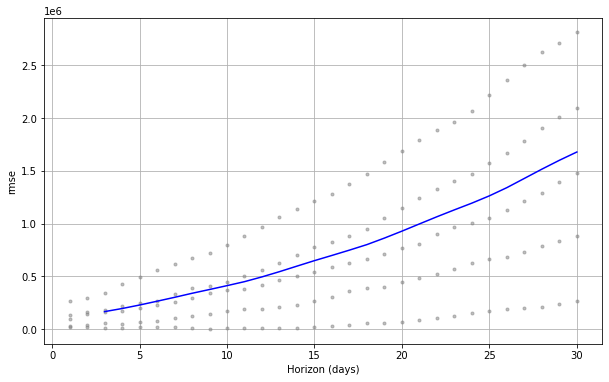

In [53]:
df_performance = plot_cross_validation_metric(df_cv,metric='rmse')

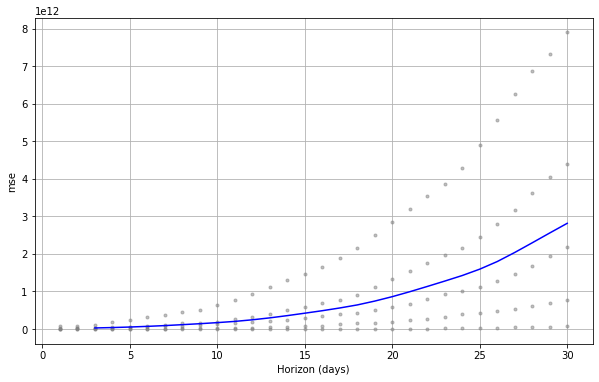

In [54]:
df_performance = plot_cross_validation_metric(df_cv,metric='mse')

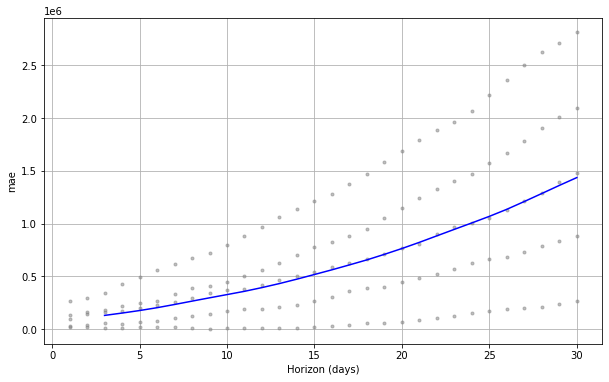

In [55]:
df_performance = plot_cross_validation_metric(df_cv,metric='mae')

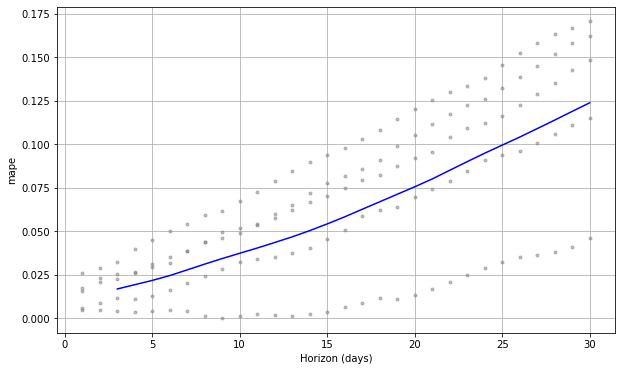

In [56]:
df_performance = plot_cross_validation_metric(df_cv,metric='mape')

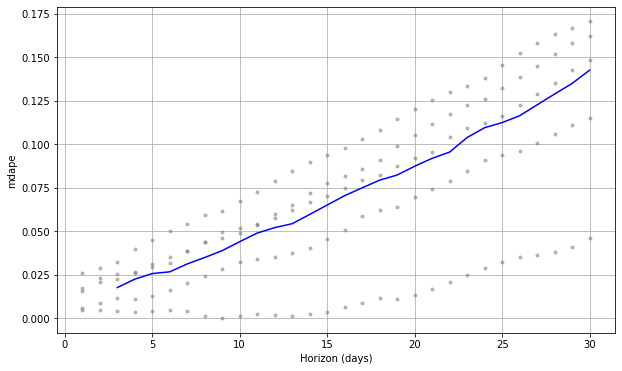

In [57]:
df_performance = plot_cross_validation_metric(df_cv,metric='mdape')